In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [47]:
train_df = pd.read_csv('Training_knight.csv')
val_df = pd.read_csv('Validation_knight.csv')
test_df = pd.read_csv('../Test_knight.csv')

In [48]:
X_train = train_df.drop(columns=['knight'])
y_train = train_df['knight']

X_val = val_df.drop(columns=['knight'])
y_val = val_df['knight']

X_test = test_df

In [49]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [50]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train_encoded)

DecisionTreeClassifier(random_state=42)

In [51]:
y_val_pred = dtc.predict(X_val)
val_f1 = f1_score(y_val_encoded, y_val_pred, average='weighted')
print(f'Validation F1 Score: {val_f1:.2f}')

Validation F1 Score: 0.95


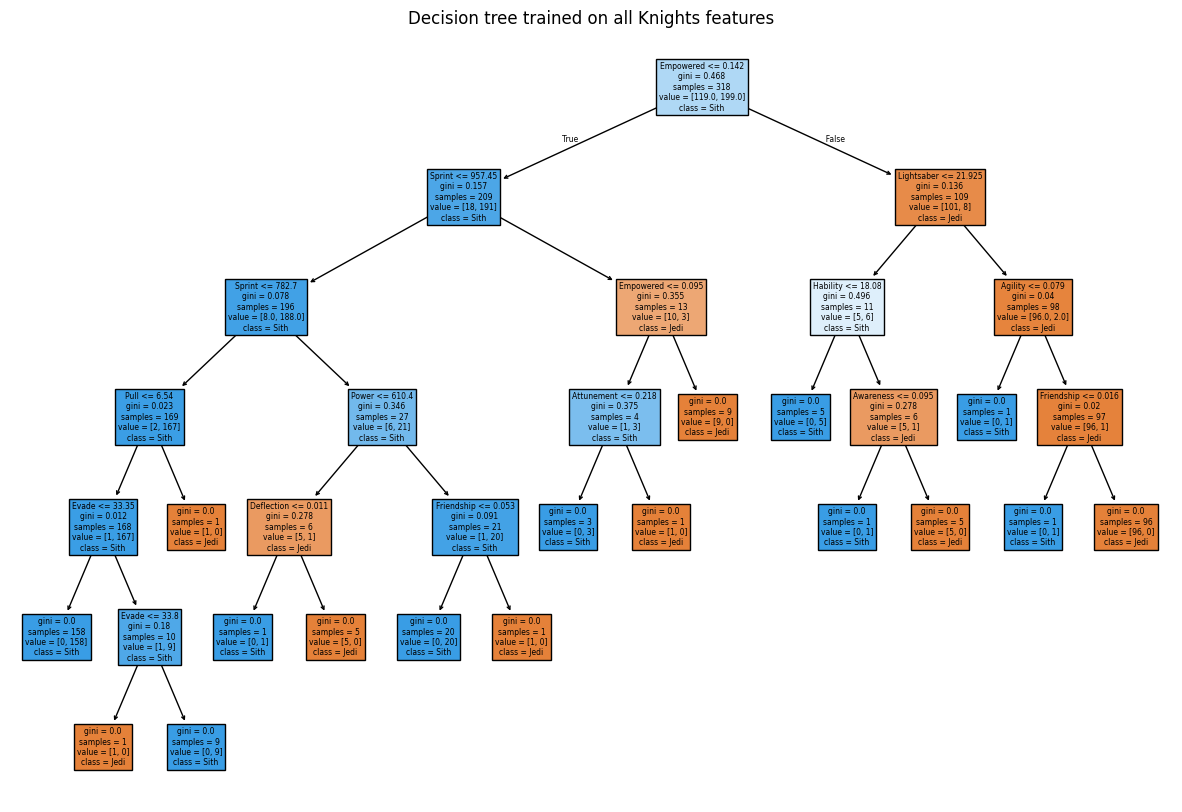

In [52]:
plt.figure(figsize=(15, 10))
plot_tree(dtc, feature_names=X_train.columns, class_names=label_encoder.classes_, filled=True)
plt.title('Decision tree trained on all Knights features')
plt.show()

In [53]:
y_test_pred = dtc.predict(X_test)

with open('Tree.txt', 'w') as f:
    for prediction in y_test_pred:
        f.write(f'{label_encoder.inverse_transform([prediction])[0]}\n')